##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Load a pandas DataFrame

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/pandas_dataframe"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial provides examples of how to load <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" class="external">pandas DataFrames</a> into TensorFlow.

You will use a small <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">heart disease dataset</a> provided by the UCI Machine Learning Repository. There are several hundred rows in the CSV. Each row describes a patient, and each column describes an attribute. You will use this information to predict whether a patient has heart disease, which is a binary classification task.

## Read data using pandas

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

2024-08-16 06:59:37.935480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 06:59:37.956364: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 06:59:37.962738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Download the CSV file containing the heart disease dataset:

In [3]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

    0/13273 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

13273/13273 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Read the CSV file using pandas:

In [4]:
df = pd.read_csv(csv_file)

This is what the data looks like:

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

You will build models to predict the label contained in the `target` column.

In [7]:
target = df.pop('target')

## A DataFrame as an array

If your data has a uniform datatype, or `dtype`, it's possible to use a pandas DataFrame anywhere you could use a NumPy array. This works because the `pandas.DataFrame` class supports the `__array__` protocol, and TensorFlow's `tf.convert_to_tensor` function accepts objects that support the protocol.

Take the numeric features from the dataset (skip the categorical features for now):

In [8]:
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


The DataFrame can be converted to a NumPy array using the `DataFrame.values` property or `numpy.array(df)`. To convert it to a tensor, use `tf.convert_to_tensor`:

In [9]:
tf.convert_to_tensor(numeric_features)

I0000 00:00:1723791580.394635  189972 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723791580.398535  189972 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723791580.402304  189972 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723791580.406024  189972 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

d negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723791581.679903  189972 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723791581.681941  189972 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723791581.683916  189972 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See mo

In general, if an object can be converted to a tensor with `tf.convert_to_tensor` it can be passed anywhere you can pass a `tf.Tensor`.

### With Model.fit

A DataFrame, interpreted as a single tensor, can be used directly as an argument to the `Model.fit` method.

Below is an example of training a model on the numeric features of the dataset.

The first step is to normalize the input ranges. Use a `tf.keras.layers.Normalization` layer for that.

To set the layer's mean and standard-deviation before running it be sure to call the `Normalization.adapt` method:

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(numeric_features))

Call the layer on the first three rows of the DataFrame to visualize an example of the output from this layer:

In [11]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93384   ,  0.03480783,  0.74578166, -0.26008663,  1.0680454 ],
       [ 1.3782114 , -1.7806157 ,  1.5923294 ,  0.75738776,  0.3802287 ],
       [ 1.3782114 , -0.87290394, -0.6651312 , -0.33687717,  1.3259766 ]],
      dtype=float32)>

Use the normalization layer as the first layer of a simple model:

In [12]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

When you pass the DataFrame as the `x` argument to `Model.fit`, Keras treats the DataFrame as it would a NumPy array:

In [13]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15


I0000 00:00:1723791583.615441  190138 service.cc:146] XLA service 0x7f944c00a090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723791583.615472  190138 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1723791583.615476  190138 service.cc:154]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1723791583.615480  190138 service.cc:154]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
I0000 00:00:1723791583.615482  190138 service.cc:154]   StreamExecutor device (3): Tesla T4, Compute Capability 7.5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 4:20 2s/step - accuracy: 0.5000 - loss: 0.7813

 37/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5634 - loss: 0.7566 

 76/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6270 - loss: 0.7141

115/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6599 - loss: 0.6927

I0000 00:00:1723791584.314363  190138 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6778 - loss: 0.6788

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6782 - loss: 0.6784


Epoch 2/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 1.0000 - loss: 0.4046

 39/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7056 - loss: 0.5695 

 79/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7035 - loss: 0.5683

118/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7093 - loss: 0.5614

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7131 - loss: 0.5535


Epoch 3/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5000 - loss: 0.3379

 38/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6844 - loss: 0.4765 

 76/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7260 - loss: 0.4824

116/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7378 - loss: 0.4847

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7406 - loss: 0.4835


Epoch 4/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5000 - loss: 0.9300

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7751 - loss: 0.4462 

 79/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7803 - loss: 0.4340

119/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7759 - loss: 0.4382

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7738 - loss: 0.4418


Epoch 5/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.0000e+00 - loss: 1.7292

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7552 - loss: 0.5039     

 83/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7756 - loss: 0.4670

127/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7822 - loss: 0.4569

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7853 - loss: 0.4522


Epoch 6/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 1.0000 - loss: 0.3825

 42/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8445 - loss: 0.3908 

 83/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8169 - loss: 0.4244

124/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4275

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8086 - loss: 0.4259


Epoch 7/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5000 - loss: 0.8894

 42/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7373 - loss: 0.5503 

 85/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7554 - loss: 0.5066

126/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7643 - loss: 0.4791

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7701 - loss: 0.4674


Epoch 8/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5000 - loss: 0.6086

 38/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7181 - loss: 0.4667 

 75/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7467 - loss: 0.4388

114/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7519 - loss: 0.4382

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7587 - loss: 0.4375


Epoch 9/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 1.0000 - loss: 0.0248

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.3295 

 81/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8307 - loss: 0.3475

122/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8266 - loss: 0.3629

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8189 - loss: 0.3755


Epoch 10/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5000 - loss: 0.7501

 41/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7166 - loss: 0.5295 

 83/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7506 - loss: 0.4825

125/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7702 - loss: 0.4612

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7763 - loss: 0.4552


Epoch 11/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 1.0000 - loss: 0.0459

 41/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.3674 

 79/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8140 - loss: 0.3870

118/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8082 - loss: 0.3972

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4008


Epoch 12/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 1.0000 - loss: 0.1334

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8685 - loss: 0.4387 

 81/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.4368

122/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8262 - loss: 0.4254

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8209 - loss: 0.4230


Epoch 13/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 1.0000 - loss: 0.2145

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8021 - loss: 0.5016 

 80/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8150 - loss: 0.4412

119/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8180 - loss: 0.4292

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8197 - loss: 0.4230


Epoch 14/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 1.0000 - loss: 0.1662

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.4317 

 79/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8494 - loss: 0.4033

120/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8382 - loss: 0.4103

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8304 - loss: 0.4119


Epoch 15/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5000 - loss: 0.6007

 39/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8376 - loss: 0.2532 

 77/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8311 - loss: 0.3006

116/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8295 - loss: 0.3229

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.3414


### With tf.data

If you want to apply `tf.data` transformations to a DataFrame of a uniform `dtype`, the `Dataset.from_tensor_slices` method will create a dataset that iterates over the rows of the DataFrame. Each row is initially a vector of values. To train a model, you need `(inputs, labels)` pairs, so pass `(features, labels)` and `Dataset.from_tensor_slices` will return the needed pairs of slices:

In [14]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(3):
  print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [15]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 3:46 2s/step - accuracy: 0.0000e+00 - loss: 1.2612

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5954 - loss: 0.6792     

 81/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6660 - loss: 0.6267

123/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6914 - loss: 0.6123

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6984 - loss: 0.6074

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6986 - loss: 0.6073


Epoch 2/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 0.4989

 41/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7607 - loss: 0.4978

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7343 - loss: 0.5139

124/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7278 - loss: 0.5195

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7271 - loss: 0.5204


Epoch 3/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.6740

 41/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7126 - loss: 0.5019

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7175 - loss: 0.4830

123/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7160 - loss: 0.4889

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7176 - loss: 0.4899


Epoch 4/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.7642

 42/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7087 - loss: 0.4616    

 84/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7282 - loss: 0.4611

126/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7285 - loss: 0.4655

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.4668


Epoch 5/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3912

 39/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8239 - loss: 0.4186

 79/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4346

120/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7782 - loss: 0.4487

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7695 - loss: 0.4536


Epoch 6/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.7579

 42/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6881 - loss: 0.4518

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7289 - loss: 0.4366

124/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7412 - loss: 0.4318

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7448 - loss: 0.4346


Epoch 7/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1.0703

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7702 - loss: 0.4845    

 79/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7743 - loss: 0.4405

119/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7811 - loss: 0.4250

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7832 - loss: 0.4221


Epoch 8/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.6826

 39/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7640 - loss: 0.4214

 77/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.4397

116/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7822 - loss: 0.4381

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7845 - loss: 0.4367


Epoch 9/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.2867

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.4934

 81/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7331 - loss: 0.4730

122/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7535 - loss: 0.4540

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7622 - loss: 0.4458


Epoch 10/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0504

 41/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.5116

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4829

123/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7885 - loss: 0.4730

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7874 - loss: 0.4647


Epoch 11/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.7733

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7646 - loss: 0.4115

 81/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7835 - loss: 0.4013

122/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7828 - loss: 0.4049

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7821 - loss: 0.4104


Epoch 12/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2018

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6946 - loss: 0.6188

 80/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7393 - loss: 0.5280

120/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7513 - loss: 0.4967

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7588 - loss: 0.4802


Epoch 13/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1207

 42/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7322 - loss: 0.4500

 81/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7374 - loss: 0.4572

120/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7460 - loss: 0.4539

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7568 - loss: 0.4469


Epoch 14/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1466

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8852 - loss: 0.3276

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8494 - loss: 0.3852

124/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8309 - loss: 0.4057

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8218 - loss: 0.4112


Epoch 15/15


  1/152 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3096

 43/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.3265

 86/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8245 - loss: 0.3552

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.3787

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8091 - loss: 0.3851


## A DataFrame as a dictionary

When you start dealing with heterogeneous data, it is no longer possible to treat the DataFrame as if it were a single array. TensorFlow tensors require that all elements have the same `dtype`.

So, in this case, you need to start treating it as a dictionary of columns, where each column has a uniform `dtype`. A DataFrame is a lot like a dictionary of arrays, so typically all you need to do is cast the DataFrame to a Python dict. Many important TensorFlow APIs support (nested-)dictionaries of arrays as inputs.

`tf.data` input pipelines handle this quite well. All `tf.data` operations handle dictionaries and tuples automatically. So, to make a dataset of dictionary-examples from a DataFrame, just cast it to a dict before slicing it with `Dataset.from_tensor_slices`:

In [16]:
numeric_features_dict = {key: value.to_numpy()[:, tf.newaxis] for key, value in dict(numeric_features).items()}
target_array =  target.to_numpy()[:, tf.newaxis]

In [17]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((numeric_features_dict , target_array))

In [18]:
len(numeric_features_dict)

5

Here are the first three examples from that dataset:

In [19]:
for row in numeric_dict_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([63])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([150])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([145])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([233])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.3])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([108])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([160])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([286])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.5])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([129])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([120])

Typically, Keras models and layers expect a single input tensor, but these classes can accept and return nested structures of dictionaries, tuples and tensors. These structures are known as "nests" (refer to the `tf.nest` module for details).

There are two equivalent ways you can write a Keras model that accepts a dictionary as input.

### 1. The Model-subclass style

You write a subclass of `tf.keras.Model` (or `tf.keras.Layer`). You directly handle the inputs, and create the outputs:

In [20]:
#@title
class MyModel(tf.keras.Model):
  def __init__(self):
    # Create all the internal layers in init.
    super().__init__()

    self.normalizer = tf.keras.layers.Normalization(axis=-1)

    self.seq = tf.keras.Sequential([
      self.normalizer,
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

    self.concat = tf.keras.layers.Concatenate(axis=1)

  def _stack(self, input_dict):
    values = []
    for key, value in sorted(input_dict.items()):
      values.append(value)

    return self.concat(values)

  def adapt(self, inputs):
    # Stack the inputs and `adapt` the normalization layer.
    inputs = self._stack(inputs)
    self.normalizer.adapt(inputs)

  def call(self, inputs):
    # Stack the inputs
    inputs = self._stack(inputs)
    # Run them through all the layers.
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(numeric_features_dict)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

This model can accept either a dictionary of columns or a dataset of dictionary-elements for training:

In [21]:
model.fit(numeric_features_dict, target_array, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 3:57 2s/step - accuracy: 1.0000 - loss: 0.6303

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8056 - loss: 0.7760

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7933 - loss: 0.7781

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7861 - loss: 0.7730

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7618 - loss: 0.7662

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7444 - loss: 0.7590

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7344 - loss: 0.7565

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7308 - loss: 0.7540

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7268 - loss: 0.7533

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7257 - loss: 0.7524

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7251 - loss: 0.7505

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7239 - loss: 0.7484

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7239 - loss: 0.7465

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7227 - loss: 0.7449

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7213 - loss: 0.7434

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7197 - loss: 0.7419

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7171 - loss: 0.7406

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7150 - loss: 0.7394

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7130 - loss: 0.7380

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7101 - loss: 0.7365

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7080 - loss: 0.7348

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7060 - loss: 0.7333

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7041 - loss: 0.7321

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7022 - loss: 0.7309

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7005 - loss: 0.7299

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6987 - loss: 0.7292

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6969 - loss: 0.7283

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6951 - loss: 0.7275

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6935 - loss: 0.7265

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6922 - loss: 0.7257

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6909 - loss: 0.7249

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6897 - loss: 0.7242

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6886 - loss: 0.7235

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6878 - loss: 0.7227

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6870 - loss: 0.7219

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6864 - loss: 0.7213

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6859 - loss: 0.7207

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6854 - loss: 0.7202

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6851 - loss: 0.7196

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6849 - loss: 0.7191

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6848 - loss: 0.7185

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6848 - loss: 0.7179

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6847 - loss: 0.7172

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6848 - loss: 0.7165

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6850 - loss: 0.7158

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6852 - loss: 0.7152

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6854 - loss: 0.7146

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6854 - loss: 0.7140

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6855 - loss: 0.7134

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6856 - loss: 0.7128

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6857 - loss: 0.7122

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6858 - loss: 0.7116

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6860 - loss: 0.7110

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6862 - loss: 0.7103

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6865 - loss: 0.7097

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6868 - loss: 0.7090

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6872 - loss: 0.7083

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6878 - loss: 0.7075

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6882 - loss: 0.7068

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6885 - loss: 0.7061

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6888 - loss: 0.7054

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6892 - loss: 0.7047

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6895 - loss: 0.7041

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6898 - loss: 0.7034

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6901 - loss: 0.7027

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6902 - loss: 0.7021

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6903 - loss: 0.7015

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6905 - loss: 0.7009

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6907 - loss: 0.7003

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6910 - loss: 0.6997

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6912 - loss: 0.6991

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6914 - loss: 0.6986

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6917 - loss: 0.6980

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6918 - loss: 0.6974

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6920 - loss: 0.6968

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6923 - loss: 0.6962

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6924 - loss: 0.6959

152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.6925 - loss: 0.6956


Epoch 2/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 1.0000 - loss: 0.3661

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7222 - loss: 0.4822 

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7433 - loss: 0.4949

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7622 - loss: 0.4953

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7757 - loss: 0.4923

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7690 - loss: 0.5008

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7675 - loss: 0.5077

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7641 - loss: 0.5144

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7616 - loss: 0.5199

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7597 - loss: 0.5246

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7570 - loss: 0.5292

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7549 - loss: 0.5324

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7549 - loss: 0.5347

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7563 - loss: 0.5362

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7568 - loss: 0.5383

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7577 - loss: 0.5397

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7584 - loss: 0.5406

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7593 - loss: 0.5413

 37/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7601 - loss: 0.5419

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7604 - loss: 0.5425

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7607 - loss: 0.5428

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7609 - loss: 0.5429

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7615 - loss: 0.5427

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7618 - loss: 0.5427

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7621 - loss: 0.5427

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7625 - loss: 0.5427

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7625 - loss: 0.5427

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7624 - loss: 0.5428

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7627 - loss: 0.5427

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7623 - loss: 0.5428

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7616 - loss: 0.5429

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7608 - loss: 0.5431

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7603 - loss: 0.5432

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7596 - loss: 0.5432

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7589 - loss: 0.5432

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7582 - loss: 0.5431

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7575 - loss: 0.5430

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7563 - loss: 0.5431

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7552 - loss: 0.5432

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7540 - loss: 0.5433

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7528 - loss: 0.5434

 83/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7517 - loss: 0.5435

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7506 - loss: 0.5436

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7495 - loss: 0.5436

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7485 - loss: 0.5437

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7475 - loss: 0.5438

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7467 - loss: 0.5439

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7460 - loss: 0.5439

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7452 - loss: 0.5440

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7444 - loss: 0.5442

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7438 - loss: 0.5443

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7430 - loss: 0.5444

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7425 - loss: 0.5444

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7418 - loss: 0.5444

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7412 - loss: 0.5443

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7407 - loss: 0.5442

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7401 - loss: 0.5442

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7396 - loss: 0.5441

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7392 - loss: 0.5441

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7389 - loss: 0.5439

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7386 - loss: 0.5438

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7383 - loss: 0.5436

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7381 - loss: 0.5434

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7380 - loss: 0.5433

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7380 - loss: 0.5431

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7379 - loss: 0.5429

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7380 - loss: 0.5427

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7379 - loss: 0.5426

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7379 - loss: 0.5425

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7379 - loss: 0.5423

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7378 - loss: 0.5422

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7376 - loss: 0.5422

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7374 - loss: 0.5422

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7372 - loss: 0.5421

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7371 - loss: 0.5420

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7369 - loss: 0.5419

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7367 - loss: 0.5419


Epoch 3/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.0000e+00 - loss: 0.8095

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.2500 - loss: 0.6896     

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.3500 - loss: 0.6632

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.3929 - loss: 0.6517

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.4298 - loss: 0.6432

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.4554 - loss: 0.6330

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.4746 - loss: 0.6226

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.4940 - loss: 0.6134

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5143 - loss: 0.6035

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5341 - loss: 0.5920

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5517 - loss: 0.5808

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5675 - loss: 0.5714

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5801 - loss: 0.5640

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5909 - loss: 0.5568

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6010 - loss: 0.5504

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6109 - loss: 0.5441

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6200 - loss: 0.5384

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6264 - loss: 0.5344

 37/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6314 - loss: 0.5306

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6360 - loss: 0.5274

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6393 - loss: 0.5250

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6421 - loss: 0.5229

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6446 - loss: 0.5211

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6469 - loss: 0.5194

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6493 - loss: 0.5180

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6516 - loss: 0.5166

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6540 - loss: 0.5152

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6565 - loss: 0.5135

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6591 - loss: 0.5120

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6614 - loss: 0.5105

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6635 - loss: 0.5092

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6655 - loss: 0.5080

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6672 - loss: 0.5070

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6688 - loss: 0.5059

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6703 - loss: 0.5050

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6718 - loss: 0.5041

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6733 - loss: 0.5032

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6746 - loss: 0.5025

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6759 - loss: 0.5016

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6771 - loss: 0.5009

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6783 - loss: 0.5002

 83/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6794 - loss: 0.4995

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6806 - loss: 0.4988

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6818 - loss: 0.4980

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6830 - loss: 0.4972

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6839 - loss: 0.4965

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6847 - loss: 0.4959

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6856 - loss: 0.4953

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6865 - loss: 0.4946

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6875 - loss: 0.4939

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6884 - loss: 0.4932

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6892 - loss: 0.4926

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6900 - loss: 0.4921

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6906 - loss: 0.4917

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6911 - loss: 0.4914

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6917 - loss: 0.4911

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6922 - loss: 0.4908

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6927 - loss: 0.4904

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6934 - loss: 0.4900

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6941 - loss: 0.4896

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6947 - loss: 0.4892

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6952 - loss: 0.4888

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6958 - loss: 0.4884

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6963 - loss: 0.4881

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6969 - loss: 0.4877

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6974 - loss: 0.4874

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6980 - loss: 0.4870

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6986 - loss: 0.4867

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6991 - loss: 0.4864

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6996 - loss: 0.4862

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7001 - loss: 0.4860

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7006 - loss: 0.4859

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7010 - loss: 0.4857

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7014 - loss: 0.4857

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7017 - loss: 0.4857

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7020 - loss: 0.4857

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7023 - loss: 0.4857


Epoch 4/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.5000 - loss: 0.7472

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6389 - loss: 0.6350 

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6933 - loss: 0.5904

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7265 - loss: 0.5602

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7479 - loss: 0.5373

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7591 - loss: 0.5242

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7715 - loss: 0.5095

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7767 - loss: 0.5004

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7816 - loss: 0.4927

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7861 - loss: 0.4857

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7879 - loss: 0.4820

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7880 - loss: 0.4805

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7870 - loss: 0.4790

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7846 - loss: 0.4797

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7837 - loss: 0.4790

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7823 - loss: 0.4791

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7801 - loss: 0.4791

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7778 - loss: 0.4788

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7754 - loss: 0.4791

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7736 - loss: 0.4795

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7717 - loss: 0.4800

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7700 - loss: 0.4803

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7682 - loss: 0.4806

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7671 - loss: 0.4804

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7654 - loss: 0.4805

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7640 - loss: 0.4808

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7628 - loss: 0.4810

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7621 - loss: 0.4809

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7617 - loss: 0.4807

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7614 - loss: 0.4805

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7606 - loss: 0.4805

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7598 - loss: 0.4804

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7591 - loss: 0.4804

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7578 - loss: 0.4806

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7563 - loss: 0.4810

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7548 - loss: 0.4814

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7535 - loss: 0.4817

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7522 - loss: 0.4820

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7507 - loss: 0.4824

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7492 - loss: 0.4830

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7477 - loss: 0.4835

 83/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7464 - loss: 0.4840

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7451 - loss: 0.4846

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7439 - loss: 0.4850

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7429 - loss: 0.4852

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7419 - loss: 0.4855

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7410 - loss: 0.4857

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7401 - loss: 0.4860

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7394 - loss: 0.4861

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7387 - loss: 0.4861

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7382 - loss: 0.4862

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7376 - loss: 0.4863

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7370 - loss: 0.4866

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7362 - loss: 0.4868

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7356 - loss: 0.4870

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7350 - loss: 0.4871

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7344 - loss: 0.4872

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7339 - loss: 0.4872

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7336 - loss: 0.4871

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7333 - loss: 0.4869

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7330 - loss: 0.4867

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7327 - loss: 0.4865

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7324 - loss: 0.4863

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7321 - loss: 0.4861

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7319 - loss: 0.4858

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7317 - loss: 0.4856

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7315 - loss: 0.4853

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7313 - loss: 0.4851

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7312 - loss: 0.4849

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7310 - loss: 0.4847

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7309 - loss: 0.4845

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7307 - loss: 0.4843

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7304 - loss: 0.4841

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7302 - loss: 0.4839

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7301 - loss: 0.4837

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7300 - loss: 0.4835

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7300 - loss: 0.4832


Epoch 5/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 1.0000 - loss: 0.1698

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9444 - loss: 0.2795 

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8767 - loss: 0.3636

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8677 - loss: 0.3786

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8516 - loss: 0.3887

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8438 - loss: 0.3916

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8279 - loss: 0.3986

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8164 - loss: 0.4040

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8095 - loss: 0.4065

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8054 - loss: 0.4072

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8030 - loss: 0.4078

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8027 - loss: 0.4073

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8022 - loss: 0.4072

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7994 - loss: 0.4082

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7969 - loss: 0.4080

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7941 - loss: 0.4078

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7912 - loss: 0.4086

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7891 - loss: 0.4089

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7879 - loss: 0.4085

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7871 - loss: 0.4074

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7866 - loss: 0.4062

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7864 - loss: 0.4052

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7862 - loss: 0.4044

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7859 - loss: 0.4035

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7858 - loss: 0.4026

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7859 - loss: 0.4014

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7859 - loss: 0.4004

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7858 - loss: 0.3994

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7854 - loss: 0.3989

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7849 - loss: 0.3987

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7841 - loss: 0.3985

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7835 - loss: 0.3981

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7829 - loss: 0.3978

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7822 - loss: 0.3976

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7816 - loss: 0.3973

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7807 - loss: 0.3973

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7801 - loss: 0.3972

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7796 - loss: 0.3973

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7792 - loss: 0.3974

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7788 - loss: 0.3976

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7784 - loss: 0.3977

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7778 - loss: 0.3979

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7773 - loss: 0.3980

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7768 - loss: 0.3982

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7763 - loss: 0.3987

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7758 - loss: 0.3991

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7752 - loss: 0.3995

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7745 - loss: 0.4000

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7739 - loss: 0.4004

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7734 - loss: 0.4009

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7728 - loss: 0.4013

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7722 - loss: 0.4018

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7717 - loss: 0.4022

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7713 - loss: 0.4026

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7709 - loss: 0.4029

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7707 - loss: 0.4031

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7703 - loss: 0.4033

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7699 - loss: 0.4035

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7696 - loss: 0.4036

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7692 - loss: 0.4038

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7688 - loss: 0.4040

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7683 - loss: 0.4044

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7678 - loss: 0.4049

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7674 - loss: 0.4054

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7670 - loss: 0.4059

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7666 - loss: 0.4065

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7662 - loss: 0.4071

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7659 - loss: 0.4077

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7655 - loss: 0.4083

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7651 - loss: 0.4089

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7647 - loss: 0.4096

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7642 - loss: 0.4103

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7638 - loss: 0.4109

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7635 - loss: 0.4115

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7631 - loss: 0.4120

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7627 - loss: 0.4126

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7624 - loss: 0.4132


In [22]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 1.0000 - loss: 0.4611

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9444 - loss: 0.4215

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8767 - loss: 0.4013

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8575 - loss: 0.3998

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8436 - loss: 0.4051

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8245 - loss: 0.4224

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8022 - loss: 0.4372

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7918 - loss: 0.4416

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7806 - loss: 0.4505

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7738 - loss: 0.4550

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7675 - loss: 0.4609

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7616 - loss: 0.4659

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7570 - loss: 0.4701

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7540 - loss: 0.4733

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7529 - loss: 0.4748

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7514 - loss: 0.4760

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7506 - loss: 0.4765

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7499 - loss: 0.4771

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7497 - loss: 0.4776

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7492 - loss: 0.4780

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7494 - loss: 0.4777

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7499 - loss: 0.4774

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7498 - loss: 0.4780

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7490 - loss: 0.4794

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7487 - loss: 0.4800

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7488 - loss: 0.4800

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7493 - loss: 0.4795

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7498 - loss: 0.4792

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7499 - loss: 0.4791

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7496 - loss: 0.4790

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7497 - loss: 0.4786

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7499 - loss: 0.4780

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7502 - loss: 0.4775

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7506 - loss: 0.4770

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7507 - loss: 0.4766

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7507 - loss: 0.4763

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7505 - loss: 0.4761

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7504 - loss: 0.4757

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7503 - loss: 0.4752

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7500 - loss: 0.4748

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7499 - loss: 0.4744

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7499 - loss: 0.4740

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7499 - loss: 0.4735

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7501 - loss: 0.4729

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7504 - loss: 0.4722

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7508 - loss: 0.4714

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7510 - loss: 0.4707

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7511 - loss: 0.4702

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7510 - loss: 0.4698

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7508 - loss: 0.4694

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7507 - loss: 0.4690

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7506 - loss: 0.4686

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7504 - loss: 0.4683

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7503 - loss: 0.4681

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7501 - loss: 0.4679

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7500 - loss: 0.4675

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7500 - loss: 0.4671

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7498 - loss: 0.4668

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7496 - loss: 0.4666

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7495 - loss: 0.4663

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7493 - loss: 0.4660

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7493 - loss: 0.4657

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7492 - loss: 0.4653

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7491 - loss: 0.4650

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7491 - loss: 0.4647

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7490 - loss: 0.4645

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7490 - loss: 0.4643

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7489 - loss: 0.4642

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4642

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4640

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4639

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4637

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4636

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4634

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4632

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7488 - loss: 0.4630

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7488 - loss: 0.4628


Epoch 2/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 1.0000 - loss: 0.4059

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 1.0000 - loss: 0.4141

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9550 - loss: 0.4427

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9457 - loss: 0.4261

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9316 - loss: 0.4345

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9180 - loss: 0.4377

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9030 - loss: 0.4534

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8861 - loss: 0.4650

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8709 - loss: 0.4712

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8604 - loss: 0.4754

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8470 - loss: 0.4844

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8361 - loss: 0.4897

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8280 - loss: 0.4919

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8212 - loss: 0.4922

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8153 - loss: 0.4915

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8114 - loss: 0.4904

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8084 - loss: 0.4884

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8061 - loss: 0.4860

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8040 - loss: 0.4835

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8024 - loss: 0.4811

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8009 - loss: 0.4786

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7992 - loss: 0.4767

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7976 - loss: 0.4746

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7962 - loss: 0.4725

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7950 - loss: 0.4705

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7941 - loss: 0.4683

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7931 - loss: 0.4666

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7923 - loss: 0.4652

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7918 - loss: 0.4636

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7916 - loss: 0.4619

 61/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7915 - loss: 0.4603

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7914 - loss: 0.4592

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7914 - loss: 0.4580

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7912 - loss: 0.4572

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7908 - loss: 0.4566

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7905 - loss: 0.4558

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7903 - loss: 0.4550

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7899 - loss: 0.4544

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7895 - loss: 0.4538

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7892 - loss: 0.4533

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7889 - loss: 0.4527

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7885 - loss: 0.4522

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7882 - loss: 0.4518

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7879 - loss: 0.4513

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7877 - loss: 0.4509

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7875 - loss: 0.4505

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7875 - loss: 0.4501

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7874 - loss: 0.4497

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7873 - loss: 0.4495

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7872 - loss: 0.4493

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7871 - loss: 0.4491

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7871 - loss: 0.4490

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7870 - loss: 0.4489

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7869 - loss: 0.4488

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7868 - loss: 0.4487

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7866 - loss: 0.4486

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7863 - loss: 0.4486

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7861 - loss: 0.4485

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7857 - loss: 0.4486

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7854 - loss: 0.4487

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7851 - loss: 0.4488

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7847 - loss: 0.4488

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7844 - loss: 0.4489

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7840 - loss: 0.4489

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7837 - loss: 0.4489

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7834 - loss: 0.4490

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7831 - loss: 0.4490

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7829 - loss: 0.4490

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7827 - loss: 0.4489

138/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7825 - loss: 0.4489

140/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7824 - loss: 0.4488

142/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7822 - loss: 0.4488

144/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7820 - loss: 0.4488

146/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7818 - loss: 0.4487

148/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7817 - loss: 0.4487

150/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7816 - loss: 0.4486

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7816 - loss: 0.4486

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7816 - loss: 0.4485


Epoch 3/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5000 - loss: 0.2669

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.4167 - loss: 0.3786

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5150 - loss: 0.3648

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5872 - loss: 0.3459

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6265 - loss: 0.3473

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6556 - loss: 0.3473

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6716 - loss: 0.3489

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6855 - loss: 0.3484

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6941 - loss: 0.3544

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6993 - loss: 0.3630

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7047 - loss: 0.3684

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7101 - loss: 0.3724

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7153 - loss: 0.3748

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7210 - loss: 0.3760

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7245 - loss: 0.3781

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7285 - loss: 0.3791

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7315 - loss: 0.3803

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7340 - loss: 0.3812

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7365 - loss: 0.3823

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7387 - loss: 0.3847

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7412 - loss: 0.3864

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7431 - loss: 0.3880

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7451 - loss: 0.3896

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7470 - loss: 0.3908

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7487 - loss: 0.3920

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7504 - loss: 0.3928

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7519 - loss: 0.3934

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7534 - loss: 0.3940

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7549 - loss: 0.3946

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7564 - loss: 0.3949

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7574 - loss: 0.3953

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7583 - loss: 0.3956

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7587 - loss: 0.3961

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7590 - loss: 0.3966

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7594 - loss: 0.3970

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7600 - loss: 0.3972

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7606 - loss: 0.3974

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7609 - loss: 0.3981

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7611 - loss: 0.3987

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7613 - loss: 0.3995

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7615 - loss: 0.4003

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7617 - loss: 0.4011

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7619 - loss: 0.4019

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7618 - loss: 0.4030

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7616 - loss: 0.4042

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7614 - loss: 0.4055

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7612 - loss: 0.4067

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7611 - loss: 0.4078

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7610 - loss: 0.4087

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7610 - loss: 0.4095

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7610 - loss: 0.4103

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7610 - loss: 0.4110

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7610 - loss: 0.4116

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7610 - loss: 0.4123

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7610 - loss: 0.4131

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7610 - loss: 0.4137

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7611 - loss: 0.4142

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7612 - loss: 0.4148

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7613 - loss: 0.4154

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7614 - loss: 0.4160

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7615 - loss: 0.4165

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7616 - loss: 0.4171

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7616 - loss: 0.4177

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7616 - loss: 0.4183

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7616 - loss: 0.4188

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7615 - loss: 0.4193

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7615 - loss: 0.4197

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7614 - loss: 0.4201

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7614 - loss: 0.4205

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7615 - loss: 0.4208

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7616 - loss: 0.4211

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7616 - loss: 0.4214

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7618 - loss: 0.4217

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7618 - loss: 0.4219

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7619 - loss: 0.4221

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7620 - loss: 0.4224

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7621 - loss: 0.4226


Epoch 4/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5000 - loss: 0.9875

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6944 - loss: 0.7065

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7717 - loss: 0.5971

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7927 - loss: 0.5431

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8063 - loss: 0.5019

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8068 - loss: 0.4818

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8119 - loss: 0.4623

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8186 - loss: 0.4464

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8256 - loss: 0.4340

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8312 - loss: 0.4234

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8334 - loss: 0.4153

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8334 - loss: 0.4085

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8320 - loss: 0.4033

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8319 - loss: 0.3983

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8326 - loss: 0.3942

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8338 - loss: 0.3899

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8355 - loss: 0.3858

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8358 - loss: 0.3837

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8362 - loss: 0.3823

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8366 - loss: 0.3813

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8364 - loss: 0.3822

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8350 - loss: 0.3833

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8333 - loss: 0.3843

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8313 - loss: 0.3858

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8293 - loss: 0.3874

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8271 - loss: 0.3892

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8254 - loss: 0.3907

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8237 - loss: 0.3921

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8220 - loss: 0.3939

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8203 - loss: 0.3954

 61/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8189 - loss: 0.3967

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8177 - loss: 0.3977

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8162 - loss: 0.3987

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8149 - loss: 0.3997

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8136 - loss: 0.4007

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8124 - loss: 0.4015

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8115 - loss: 0.4020

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8108 - loss: 0.4024

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8100 - loss: 0.4032

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8089 - loss: 0.4044

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8079 - loss: 0.4055

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8067 - loss: 0.4068

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8054 - loss: 0.4081

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8041 - loss: 0.4094

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8030 - loss: 0.4105

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8019 - loss: 0.4119

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8009 - loss: 0.4131

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8001 - loss: 0.4141

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7993 - loss: 0.4150

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7986 - loss: 0.4157

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.4164

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7972 - loss: 0.4172

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7964 - loss: 0.4180

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7955 - loss: 0.4188

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7947 - loss: 0.4196

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7940 - loss: 0.4203

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7934 - loss: 0.4209

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7928 - loss: 0.4215

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7923 - loss: 0.4220

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7917 - loss: 0.4226

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7912 - loss: 0.4231

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7908 - loss: 0.4236

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7903 - loss: 0.4241

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7899 - loss: 0.4246

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7895 - loss: 0.4250

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7890 - loss: 0.4254

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7886 - loss: 0.4258

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7881 - loss: 0.4261

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7877 - loss: 0.4265

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7872 - loss: 0.4268

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7868 - loss: 0.4271

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7864 - loss: 0.4274

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7860 - loss: 0.4276

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7857 - loss: 0.4278

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7854 - loss: 0.4280

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7851 - loss: 0.4281

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7848 - loss: 0.4282


Epoch 5/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5000 - loss: 0.9751

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6944 - loss: 0.7033

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7067 - loss: 0.6674

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6918 - loss: 0.6634

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6947 - loss: 0.6355

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7027 - loss: 0.6057

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7053 - loss: 0.5824

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7102 - loss: 0.5626

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7068 - loss: 0.5491

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7064 - loss: 0.5368

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7076 - loss: 0.5256

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7089 - loss: 0.5168

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7102 - loss: 0.5093

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7114 - loss: 0.5027

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7125 - loss: 0.4971

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7131 - loss: 0.4950

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7128 - loss: 0.4942

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7110 - loss: 0.4950

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7099 - loss: 0.4958

 39/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7092 - loss: 0.4965

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7080 - loss: 0.4973

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7073 - loss: 0.4974

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7069 - loss: 0.4976

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7065 - loss: 0.4980

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7059 - loss: 0.4986

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7050 - loss: 0.5002

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7043 - loss: 0.5017

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7035 - loss: 0.5031

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7030 - loss: 0.5044

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7030 - loss: 0.5050

 61/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7032 - loss: 0.5051

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7035 - loss: 0.5052

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7037 - loss: 0.5054

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7039 - loss: 0.5054

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7042 - loss: 0.5054

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7048 - loss: 0.5052

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7054 - loss: 0.5048

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7059 - loss: 0.5045

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7065 - loss: 0.5040

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7071 - loss: 0.5034

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7076 - loss: 0.5029

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7081 - loss: 0.5024

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7087 - loss: 0.5017

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7094 - loss: 0.5009

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7102 - loss: 0.4999

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7111 - loss: 0.4988

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7120 - loss: 0.4977

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7127 - loss: 0.4967

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7135 - loss: 0.4957

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7142 - loss: 0.4947

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7149 - loss: 0.4936

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7157 - loss: 0.4925

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7165 - loss: 0.4914

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7173 - loss: 0.4904

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7181 - loss: 0.4893

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7189 - loss: 0.4883

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7197 - loss: 0.4872

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7204 - loss: 0.4861

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7212 - loss: 0.4851

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7220 - loss: 0.4841

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7227 - loss: 0.4834

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7233 - loss: 0.4827

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7240 - loss: 0.4820

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7247 - loss: 0.4814

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7253 - loss: 0.4807

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7260 - loss: 0.4800

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7266 - loss: 0.4794

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7272 - loss: 0.4788

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7277 - loss: 0.4784

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7282 - loss: 0.4779

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7288 - loss: 0.4774

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7293 - loss: 0.4769

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7299 - loss: 0.4764

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7304 - loss: 0.4759

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7309 - loss: 0.4754

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7315 - loss: 0.4748

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7320 - loss: 0.4743


Here are the predictions for the first three examples:

In [23]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.07420629],
       [0.00349799],
       [0.28239426]], dtype=float32)

### 2. The Keras functional style

In [24]:
inputs = {}
for name, column in numeric_features.items():
  inputs[name] = tf.keras.Input(
      shape=(1,), name=name, dtype=tf.float32)

inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>}

In [25]:
xs = [value for key, value in sorted(inputs.items())]

concat = tf.keras.layers.Concatenate(axis=1)
x = concat(xs)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

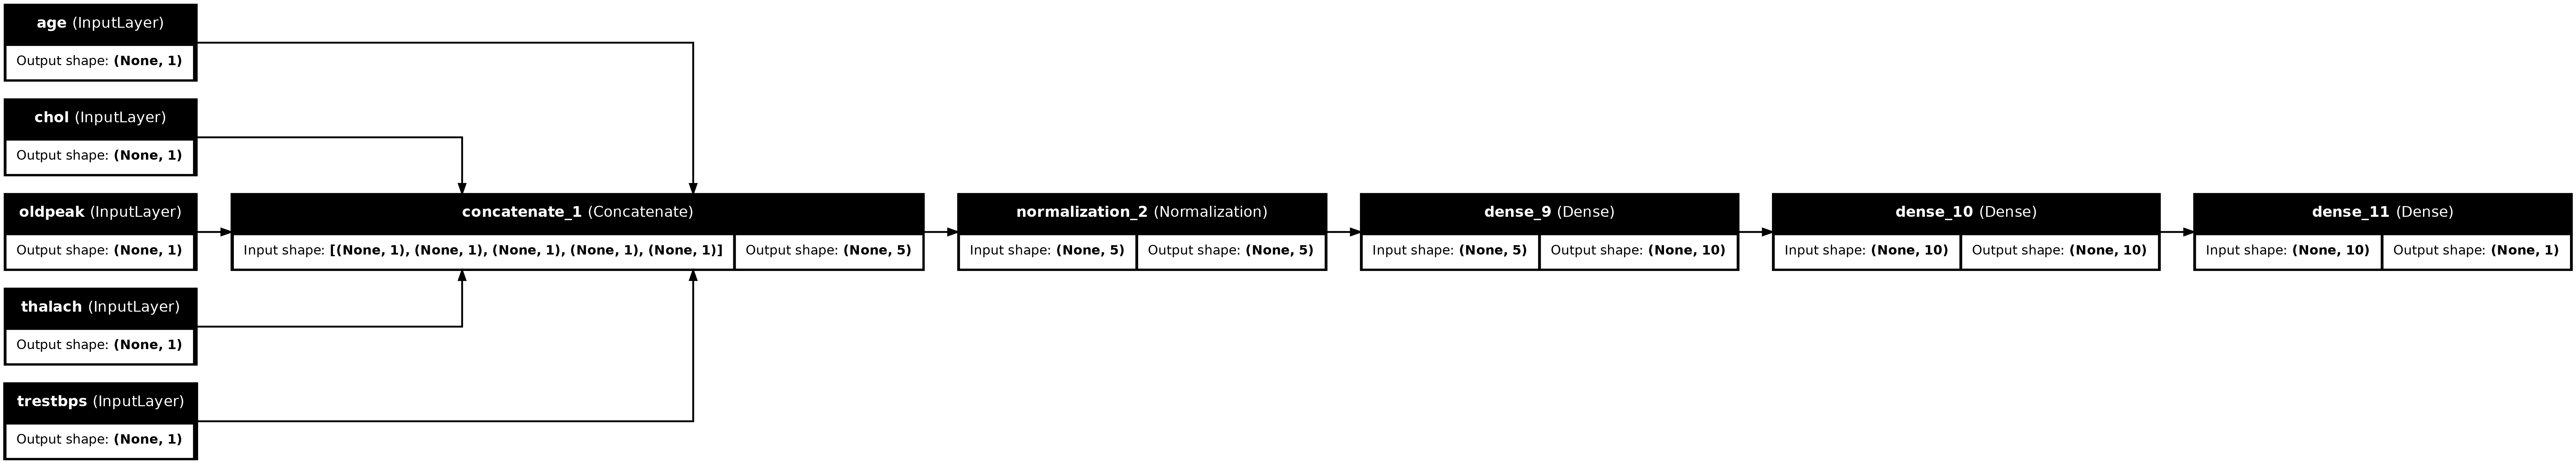

In [26]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True,  show_layer_names=True)

You can train the functional model the same way as the model subclass:

In [27]:
model.fit(numeric_features_dict, target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 1.0000 - loss: 0.7474

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8889 - loss: 0.7749  

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8233 - loss: 0.7637

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8075 - loss: 0.7555

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7978 - loss: 0.7516

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7998 - loss: 0.7482

 13/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7998 - loss: 0.7462

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8013 - loss: 0.7458

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8032 - loss: 0.7447

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8040 - loss: 0.7432

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8041 - loss: 0.7419

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8037 - loss: 0.7410

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8023 - loss: 0.7401

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8016 - loss: 0.7394

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8013 - loss: 0.7385

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7999 - loss: 0.7375

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7980 - loss: 0.7364

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7971 - loss: 0.7354

 37/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7966 - loss: 0.7342

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7957 - loss: 0.7332

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7946 - loss: 0.7322

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7929 - loss: 0.7311

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7904 - loss: 0.7302

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7879 - loss: 0.7293

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7854 - loss: 0.7285

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7833 - loss: 0.7278

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7818 - loss: 0.7270

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7804 - loss: 0.7263

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7792 - loss: 0.7257

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7782 - loss: 0.7250

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7772 - loss: 0.7242

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7760 - loss: 0.7235

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7745 - loss: 0.7229

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7734 - loss: 0.7222

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7725 - loss: 0.7215

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7715 - loss: 0.7208

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7706 - loss: 0.7202

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7697 - loss: 0.7196

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7691 - loss: 0.7190

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7682 - loss: 0.7184

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7673 - loss: 0.7179

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7666 - loss: 0.7174

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7658 - loss: 0.7169

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7650 - loss: 0.7164

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7645 - loss: 0.7158

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7640 - loss: 0.7153

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7635 - loss: 0.7148

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7631 - loss: 0.7143

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7627 - loss: 0.7137

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7623 - loss: 0.7132

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7618 - loss: 0.7127

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7613 - loss: 0.7122

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7608 - loss: 0.7117

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7603 - loss: 0.7112

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7599 - loss: 0.7108

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7595 - loss: 0.7103

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7591 - loss: 0.7098

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7588 - loss: 0.7093

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7585 - loss: 0.7088

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7583 - loss: 0.7082

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7581 - loss: 0.7077

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7579 - loss: 0.7071

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7577 - loss: 0.7066

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7575 - loss: 0.7061

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7573 - loss: 0.7055

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7572 - loss: 0.7050

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7570 - loss: 0.7045

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7569 - loss: 0.7040

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7567 - loss: 0.7035

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7565 - loss: 0.7031

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7563 - loss: 0.7026

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7561 - loss: 0.7021

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7558 - loss: 0.7017

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7554 - loss: 0.7013

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7551 - loss: 0.7009

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7548 - loss: 0.7005

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7544 - loss: 0.7001


Epoch 2/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 1.0000 - loss: 0.4866

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8056 - loss: 0.5608 

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7933 - loss: 0.5760

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7980 - loss: 0.5804

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8035 - loss: 0.5793

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8004 - loss: 0.5824

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7912 - loss: 0.5877

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7800 - loss: 0.5934

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7720 - loss: 0.5974

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7675 - loss: 0.6000

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7664 - loss: 0.6011

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7655 - loss: 0.6015

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7630 - loss: 0.6026

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7596 - loss: 0.6041

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7562 - loss: 0.6057

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7524 - loss: 0.6069

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7488 - loss: 0.6081

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7449 - loss: 0.6091

 37/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7420 - loss: 0.6097

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7396 - loss: 0.6102

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7373 - loss: 0.6104

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7344 - loss: 0.6108

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7320 - loss: 0.6111

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7290 - loss: 0.6116

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7260 - loss: 0.6122

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7233 - loss: 0.6129

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7212 - loss: 0.6133

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7195 - loss: 0.6135

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7181 - loss: 0.6136

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7173 - loss: 0.6135

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7164 - loss: 0.6134

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7155 - loss: 0.6132

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7147 - loss: 0.6130

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7142 - loss: 0.6127

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7138 - loss: 0.6124

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7136 - loss: 0.6120

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7134 - loss: 0.6116

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7132 - loss: 0.6111

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7130 - loss: 0.6107

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7130 - loss: 0.6102

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7132 - loss: 0.6096

 83/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7135 - loss: 0.6090

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7137 - loss: 0.6083

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7137 - loss: 0.6078

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7138 - loss: 0.6072

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7138 - loss: 0.6068

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7139 - loss: 0.6062

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7141 - loss: 0.6057

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7144 - loss: 0.6052

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7147 - loss: 0.6046

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7148 - loss: 0.6042

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7148 - loss: 0.6038

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7150 - loss: 0.6033

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7151 - loss: 0.6029

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7151 - loss: 0.6025

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7153 - loss: 0.6021

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7154 - loss: 0.6017

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7154 - loss: 0.6013

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7155 - loss: 0.6009

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7155 - loss: 0.6005

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7156 - loss: 0.6001

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7155 - loss: 0.5998

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7155 - loss: 0.5995

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7155 - loss: 0.5992

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7155 - loss: 0.5988

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7156 - loss: 0.5985

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7157 - loss: 0.5981

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7157 - loss: 0.5978

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7157 - loss: 0.5975

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7158 - loss: 0.5972

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7158 - loss: 0.5969

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7159 - loss: 0.5966

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7159 - loss: 0.5964

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7160 - loss: 0.5961

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7161 - loss: 0.5958

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7163 - loss: 0.5954

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7164 - loss: 0.5951


Epoch 3/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 1.0000 - loss: 0.3880

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8056 - loss: 0.4823 

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7483 - loss: 0.5149

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7335 - loss: 0.5317

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7078 - loss: 0.5565

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7002 - loss: 0.5640

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7002 - loss: 0.5637

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6988 - loss: 0.5629

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6985 - loss: 0.5602

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7004 - loss: 0.5566

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7011 - loss: 0.5527

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7029 - loss: 0.5484

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7022 - loss: 0.5464

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6998 - loss: 0.5456

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6981 - loss: 0.5447

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6964 - loss: 0.5447

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6948 - loss: 0.5443

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6928 - loss: 0.5439

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6912 - loss: 0.5434

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6898 - loss: 0.5433

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6886 - loss: 0.5431

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6883 - loss: 0.5428

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6887 - loss: 0.5421

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6896 - loss: 0.5414

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6909 - loss: 0.5405

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6922 - loss: 0.5396

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6937 - loss: 0.5385

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6955 - loss: 0.5371

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6973 - loss: 0.5358

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6991 - loss: 0.5345

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7004 - loss: 0.5333

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7014 - loss: 0.5325

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7025 - loss: 0.5316

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7036 - loss: 0.5307

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7046 - loss: 0.5298

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7056 - loss: 0.5289

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7066 - loss: 0.5281

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7073 - loss: 0.5274

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7077 - loss: 0.5269

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7079 - loss: 0.5267

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7080 - loss: 0.5264

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7083 - loss: 0.5262

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7085 - loss: 0.5259

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7088 - loss: 0.5257

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7090 - loss: 0.5255

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7092 - loss: 0.5254

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7094 - loss: 0.5253

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7095 - loss: 0.5252

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7095 - loss: 0.5251

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7094 - loss: 0.5251

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7095 - loss: 0.5249

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7096 - loss: 0.5247

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7098 - loss: 0.5244

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7100 - loss: 0.5241

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7102 - loss: 0.5239

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7105 - loss: 0.5235

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7108 - loss: 0.5232

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7111 - loss: 0.5229

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7113 - loss: 0.5226

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7115 - loss: 0.5224

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7117 - loss: 0.5221

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7119 - loss: 0.5218

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7121 - loss: 0.5215

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7124 - loss: 0.5212

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7126 - loss: 0.5209

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7128 - loss: 0.5207

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7129 - loss: 0.5205

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7130 - loss: 0.5203

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7130 - loss: 0.5201

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7131 - loss: 0.5200

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7131 - loss: 0.5199

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7132 - loss: 0.5197

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7134 - loss: 0.5195

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7135 - loss: 0.5193

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7137 - loss: 0.5192

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7139 - loss: 0.5191

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7140 - loss: 0.5189


Epoch 4/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 1.0000 - loss: 0.1994

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8611 - loss: 0.3070 

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8067 - loss: 0.3660

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7956 - loss: 0.3944

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7885 - loss: 0.4133

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7795 - loss: 0.4310

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7702 - loss: 0.4460

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7687 - loss: 0.4509

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7673 - loss: 0.4530

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7690 - loss: 0.4517

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7701 - loss: 0.4496

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7718 - loss: 0.4479

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7737 - loss: 0.4456

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7765 - loss: 0.4429

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7774 - loss: 0.4409

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7775 - loss: 0.4396

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7779 - loss: 0.4384

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7782 - loss: 0.4375

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7787 - loss: 0.4368

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7791 - loss: 0.4360

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7793 - loss: 0.4351

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7794 - loss: 0.4343

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7792 - loss: 0.4342

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7795 - loss: 0.4337

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7799 - loss: 0.4333

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7802 - loss: 0.4331

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7805 - loss: 0.4333

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7808 - loss: 0.4336

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7809 - loss: 0.4339

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7811 - loss: 0.4341

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7812 - loss: 0.4343

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7812 - loss: 0.4348

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7810 - loss: 0.4354

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7809 - loss: 0.4359

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7808 - loss: 0.4362

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7804 - loss: 0.4369

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7798 - loss: 0.4378

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7793 - loss: 0.4386

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7788 - loss: 0.4393

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7783 - loss: 0.4399

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7777 - loss: 0.4404

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7768 - loss: 0.4413

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7758 - loss: 0.4424

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7749 - loss: 0.4433

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7739 - loss: 0.4443

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7732 - loss: 0.4450

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7724 - loss: 0.4458

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7716 - loss: 0.4466

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7708 - loss: 0.4474

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7699 - loss: 0.4484

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7690 - loss: 0.4493

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7682 - loss: 0.4503

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7674 - loss: 0.4513

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7664 - loss: 0.4524

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7655 - loss: 0.4534

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7648 - loss: 0.4543

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7641 - loss: 0.4551

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7635 - loss: 0.4559

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7630 - loss: 0.4565

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7625 - loss: 0.4571

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7621 - loss: 0.4577

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7616 - loss: 0.4582

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7612 - loss: 0.4586

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7608 - loss: 0.4590

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7603 - loss: 0.4595

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7597 - loss: 0.4600

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7591 - loss: 0.4605

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7586 - loss: 0.4609

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7581 - loss: 0.4613

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7576 - loss: 0.4617

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7570 - loss: 0.4621

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7565 - loss: 0.4624

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7560 - loss: 0.4627

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7556 - loss: 0.4630

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7552 - loss: 0.4632

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7549 - loss: 0.4634

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7545 - loss: 0.4637


Epoch 5/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 1.0000 - loss: 0.1325

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 1.0000 - loss: 0.2051 

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8900 - loss: 0.4061

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8109 - loss: 0.5241

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7812 - loss: 0.5621

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7602 - loss: 0.5797

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7539 - loss: 0.5809

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7523 - loss: 0.5757

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7512 - loss: 0.5682

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7504 - loss: 0.5604

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7486 - loss: 0.5556

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7492 - loss: 0.5504

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7505 - loss: 0.5465

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7522 - loss: 0.5427

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7517 - loss: 0.5403

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7508 - loss: 0.5382

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7501 - loss: 0.5362

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7503 - loss: 0.5336

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7508 - loss: 0.5309

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7506 - loss: 0.5286

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7501 - loss: 0.5262

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7500 - loss: 0.5236

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7499 - loss: 0.5214

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7497 - loss: 0.5194

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7497 - loss: 0.5172

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7498 - loss: 0.5151

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7499 - loss: 0.5128

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7498 - loss: 0.5108

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7499 - loss: 0.5088

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7497 - loss: 0.5071

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7493 - loss: 0.5056

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7489 - loss: 0.5041

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7485 - loss: 0.5026

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7482 - loss: 0.5011

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7481 - loss: 0.4997

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7480 - loss: 0.4985

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7481 - loss: 0.4971

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7481 - loss: 0.4960

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7481 - loss: 0.4948

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7481 - loss: 0.4936

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7480 - loss: 0.4926

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7479 - loss: 0.4915

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7478 - loss: 0.4905

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7477 - loss: 0.4895

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7476 - loss: 0.4885

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7476 - loss: 0.4876

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7475 - loss: 0.4868

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7474 - loss: 0.4860

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7474 - loss: 0.4853

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7475 - loss: 0.4845

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7476 - loss: 0.4837

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7476 - loss: 0.4831

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7477 - loss: 0.4827

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7476 - loss: 0.4824

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7476 - loss: 0.4821

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7476 - loss: 0.4818

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7475 - loss: 0.4816

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7475 - loss: 0.4813

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7474 - loss: 0.4810

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7474 - loss: 0.4807

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7474 - loss: 0.4804

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7473 - loss: 0.4800

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7472 - loss: 0.4797

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7471 - loss: 0.4794

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7471 - loss: 0.4790

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7471 - loss: 0.4786

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7471 - loss: 0.4782

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7471 - loss: 0.4778

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7471 - loss: 0.4774

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7470 - loss: 0.4771

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7468 - loss: 0.4768

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7467 - loss: 0.4766

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7465 - loss: 0.4763

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7462 - loss: 0.4761

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7459 - loss: 0.4760

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7456 - loss: 0.4759

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7454 - loss: 0.4758


In [28]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.5000 - loss: 0.5306

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6389 - loss: 0.3944

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6933 - loss: 0.4097

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7146 - loss: 0.4172

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7325 - loss: 0.4120

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7291 - loss: 0.4110

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7276 - loss: 0.4121

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7271 - loss: 0.4133

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7254 - loss: 0.4141

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7258 - loss: 0.4150

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7264 - loss: 0.4156

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7241 - loss: 0.4165

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7200 - loss: 0.4200

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7149 - loss: 0.4237

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7116 - loss: 0.4262

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7096 - loss: 0.4272

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7080 - loss: 0.4276

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7065 - loss: 0.4281

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7061 - loss: 0.4278

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7062 - loss: 0.4275

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7063 - loss: 0.4277

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7069 - loss: 0.4283

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7077 - loss: 0.4286

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7082 - loss: 0.4296

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7088 - loss: 0.4303

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7097 - loss: 0.4307

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7106 - loss: 0.4310

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7108 - loss: 0.4316

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7110 - loss: 0.4321

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7112 - loss: 0.4327

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7116 - loss: 0.4332

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7120 - loss: 0.4337

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7124 - loss: 0.4342

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7125 - loss: 0.4351

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7123 - loss: 0.4363

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7119 - loss: 0.4373

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7116 - loss: 0.4384

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7114 - loss: 0.4393

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7112 - loss: 0.4403

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7107 - loss: 0.4414

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7102 - loss: 0.4425

 83/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7099 - loss: 0.4435

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7096 - loss: 0.4444

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7093 - loss: 0.4455

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7090 - loss: 0.4467

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7088 - loss: 0.4477

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7086 - loss: 0.4487

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7083 - loss: 0.4496

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7083 - loss: 0.4504

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7083 - loss: 0.4510

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7085 - loss: 0.4516

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7087 - loss: 0.4520

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7089 - loss: 0.4524

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7092 - loss: 0.4529

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7093 - loss: 0.4534

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7094 - loss: 0.4539

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7096 - loss: 0.4542

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7097 - loss: 0.4546

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7098 - loss: 0.4549

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7100 - loss: 0.4553

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7102 - loss: 0.4556

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7104 - loss: 0.4558

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7106 - loss: 0.4560

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7108 - loss: 0.4562

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7110 - loss: 0.4564

130/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7111 - loss: 0.4565

132/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7113 - loss: 0.4566

134/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7114 - loss: 0.4568

136/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7117 - loss: 0.4568

138/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7119 - loss: 0.4568

140/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7122 - loss: 0.4568

142/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7124 - loss: 0.4568

144/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7127 - loss: 0.4567

146/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7131 - loss: 0.4566

148/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7135 - loss: 0.4564

150/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7137 - loss: 0.4563

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7139 - loss: 0.4563

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7140 - loss: 0.4563


Epoch 2/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5000 - loss: 0.4320

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5000 - loss: 0.4344

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5650 - loss: 0.4322

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6009 - loss: 0.4447

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6371 - loss: 0.4454

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6642 - loss: 0.4397

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6759 - loss: 0.4365

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6869 - loss: 0.4341

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6970 - loss: 0.4285

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7033 - loss: 0.4255

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7084 - loss: 0.4220

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7125 - loss: 0.4180

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7175 - loss: 0.4131

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7217 - loss: 0.4088

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7263 - loss: 0.4046

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7302 - loss: 0.4011

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7326 - loss: 0.3997

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7346 - loss: 0.3984

 37/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7364 - loss: 0.3973

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7386 - loss: 0.3959

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7396 - loss: 0.3951

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7394 - loss: 0.3952

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7392 - loss: 0.3954

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7389 - loss: 0.3954

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7388 - loss: 0.3950

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7390 - loss: 0.3943

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7395 - loss: 0.3933

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7403 - loss: 0.3921

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7410 - loss: 0.3910

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7412 - loss: 0.3904

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7415 - loss: 0.3900

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7415 - loss: 0.3900

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7411 - loss: 0.3904

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7409 - loss: 0.3909

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7406 - loss: 0.3913

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7404 - loss: 0.3917

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7402 - loss: 0.3920

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7402 - loss: 0.3922

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7403 - loss: 0.3924

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7404 - loss: 0.3927

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7405 - loss: 0.3930

 83/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7406 - loss: 0.3932

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7406 - loss: 0.3936

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7404 - loss: 0.3940

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7404 - loss: 0.3942

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7402 - loss: 0.3945

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7402 - loss: 0.3946

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7403 - loss: 0.3949

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7403 - loss: 0.3954

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7401 - loss: 0.3960

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7400 - loss: 0.3966

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7399 - loss: 0.3971

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7399 - loss: 0.3976

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7397 - loss: 0.3981

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7394 - loss: 0.3988

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7392 - loss: 0.3994

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7388 - loss: 0.4001

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7385 - loss: 0.4009

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7382 - loss: 0.4016

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7380 - loss: 0.4024

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7379 - loss: 0.4031

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7378 - loss: 0.4038

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7377 - loss: 0.4046

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7375 - loss: 0.4055

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7373 - loss: 0.4063

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7371 - loss: 0.4070

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7369 - loss: 0.4076

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7368 - loss: 0.4081

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7368 - loss: 0.4086

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7368 - loss: 0.4090

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7367 - loss: 0.4095

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7367 - loss: 0.4100

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7366 - loss: 0.4105

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7365 - loss: 0.4110

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7365 - loss: 0.4114

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7364 - loss: 0.4119

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7363 - loss: 0.4123


Epoch 3/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5000 - loss: 0.8350

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5556 - loss: 0.6944

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5983 - loss: 0.6243

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6145 - loss: 0.6181

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6153 - loss: 0.6308

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6245 - loss: 0.6242

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6391 - loss: 0.6101

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6504 - loss: 0.5954

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6595 - loss: 0.5806

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6640 - loss: 0.5714

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6682 - loss: 0.5640

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6719 - loss: 0.5594

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6761 - loss: 0.5543

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6791 - loss: 0.5499

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6813 - loss: 0.5465

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6834 - loss: 0.5440

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6844 - loss: 0.5415

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6859 - loss: 0.5385

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6862 - loss: 0.5364

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6860 - loss: 0.5348

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6862 - loss: 0.5330

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6866 - loss: 0.5315

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6875 - loss: 0.5298

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6889 - loss: 0.5276

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6903 - loss: 0.5254

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6910 - loss: 0.5236

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6915 - loss: 0.5218

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6920 - loss: 0.5203

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6929 - loss: 0.5186

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6940 - loss: 0.5167

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6950 - loss: 0.5150

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6958 - loss: 0.5135

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6965 - loss: 0.5120

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6973 - loss: 0.5104

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6982 - loss: 0.5088

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6993 - loss: 0.5074

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7000 - loss: 0.5060

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7008 - loss: 0.5046

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7013 - loss: 0.5033

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7020 - loss: 0.5021

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7027 - loss: 0.5010

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7033 - loss: 0.4998

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7039 - loss: 0.4986

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7045 - loss: 0.4975

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7048 - loss: 0.4966

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7051 - loss: 0.4957

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7055 - loss: 0.4947

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7059 - loss: 0.4937

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7064 - loss: 0.4928

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7067 - loss: 0.4921

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7070 - loss: 0.4915

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7073 - loss: 0.4909

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7076 - loss: 0.4902

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7080 - loss: 0.4895

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7083 - loss: 0.4889

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7086 - loss: 0.4881

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7089 - loss: 0.4874

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7091 - loss: 0.4868

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7094 - loss: 0.4861

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7097 - loss: 0.4854

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7100 - loss: 0.4848

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7102 - loss: 0.4843

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7104 - loss: 0.4838

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7106 - loss: 0.4834

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7108 - loss: 0.4829

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7110 - loss: 0.4824

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7113 - loss: 0.4818

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7116 - loss: 0.4813

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7118 - loss: 0.4807

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7121 - loss: 0.4803

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7123 - loss: 0.4798

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7126 - loss: 0.4794

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7128 - loss: 0.4789

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7130 - loss: 0.4784

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7132 - loss: 0.4779

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7135 - loss: 0.4774

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7138 - loss: 0.4769


Epoch 4/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 1.0000 - loss: 0.2058

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8056 - loss: 0.2753

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7933 - loss: 0.2744

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8082 - loss: 0.2679

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8246 - loss: 0.2573

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8263 - loss: 0.2613

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8224 - loss: 0.2760

 15/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8163 - loss: 0.2881

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8129 - loss: 0.2961

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8084 - loss: 0.3028

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8034 - loss: 0.3090

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7993 - loss: 0.3145

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7941 - loss: 0.3202

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7891 - loss: 0.3266

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7843 - loss: 0.3332

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7781 - loss: 0.3394

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7729 - loss: 0.3438

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7685 - loss: 0.3470

 37/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7647 - loss: 0.3498

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7615 - loss: 0.3524

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7593 - loss: 0.3545

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7573 - loss: 0.3569

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7551 - loss: 0.3591

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7536 - loss: 0.3606

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7528 - loss: 0.3616

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7522 - loss: 0.3624

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7518 - loss: 0.3631

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7515 - loss: 0.3636

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7512 - loss: 0.3645

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7512 - loss: 0.3653

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7515 - loss: 0.3658

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7518 - loss: 0.3662

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7522 - loss: 0.3665

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7524 - loss: 0.3669

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7528 - loss: 0.3669

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7531 - loss: 0.3670

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7531 - loss: 0.3673

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7532 - loss: 0.3677

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7533 - loss: 0.3680

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7534 - loss: 0.3686

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7537 - loss: 0.3689

 83/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7538 - loss: 0.3695

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7539 - loss: 0.3704

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7540 - loss: 0.3711

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7541 - loss: 0.3716

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7542 - loss: 0.3722

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7542 - loss: 0.3729

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7541 - loss: 0.3735

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7540 - loss: 0.3742

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7541 - loss: 0.3747

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7541 - loss: 0.3753

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7541 - loss: 0.3759

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7541 - loss: 0.3766

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7541 - loss: 0.3774

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7541 - loss: 0.3782

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7542 - loss: 0.3789

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7542 - loss: 0.3797

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7542 - loss: 0.3804

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7543 - loss: 0.3811

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7544 - loss: 0.3818

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7544 - loss: 0.3825

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7543 - loss: 0.3834

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7543 - loss: 0.3843

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7543 - loss: 0.3851

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7542 - loss: 0.3859

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7542 - loss: 0.3867

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7541 - loss: 0.3875

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7540 - loss: 0.3882

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7539 - loss: 0.3889

138/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7538 - loss: 0.3892

140/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7538 - loss: 0.3899

142/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7537 - loss: 0.3904

144/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7536 - loss: 0.3911

146/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7536 - loss: 0.3917

148/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7536 - loss: 0.3923

150/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7536 - loss: 0.3930

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7535 - loss: 0.3935

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7535 - loss: 0.3938


Epoch 5/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5000 - loss: 0.4144

  3/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6944 - loss: 0.3012

  5/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7717 - loss: 0.3066

  7/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7944 - loss: 0.3208

  9/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7876 - loss: 0.3327

 11/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7915 - loss: 0.3329

 13/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7930 - loss: 0.3384

 15/152 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7884 - loss: 0.3501

 17/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7847 - loss: 0.3600

 19/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7804 - loss: 0.3682

 21/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7746 - loss: 0.3779

 23/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7701 - loss: 0.3862

 25/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7640 - loss: 0.3941

 27/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7605 - loss: 0.4005

 29/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7576 - loss: 0.4047

 31/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7558 - loss: 0.4074

 33/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7538 - loss: 0.4107

 35/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7530 - loss: 0.4126

 37/152 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7523 - loss: 0.4138

 39/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7513 - loss: 0.4161

 41/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7505 - loss: 0.4189

 43/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7492 - loss: 0.4220

 45/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7482 - loss: 0.4247

 47/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7472 - loss: 0.4270

 49/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7466 - loss: 0.4287

 51/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7464 - loss: 0.4299

 53/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7467 - loss: 0.4307

 55/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7465 - loss: 0.4317

 57/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7459 - loss: 0.4331

 59/152 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7456 - loss: 0.4342

 61/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7451 - loss: 0.4351

 63/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7448 - loss: 0.4358

 65/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7446 - loss: 0.4363

 67/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7444 - loss: 0.4366

 69/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7445 - loss: 0.4368

 71/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7445 - loss: 0.4370

 73/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7443 - loss: 0.4375

 75/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7442 - loss: 0.4376

 77/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7439 - loss: 0.4378

 79/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7436 - loss: 0.4380

 81/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7435 - loss: 0.4380

 83/152 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7435 - loss: 0.4380

 85/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7433 - loss: 0.4382

 87/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7431 - loss: 0.4384

 89/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7429 - loss: 0.4385

 91/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7428 - loss: 0.4387

 93/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7427 - loss: 0.4387

 95/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7425 - loss: 0.4389

 97/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7423 - loss: 0.4391

 99/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7423 - loss: 0.4392

101/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7424 - loss: 0.4393

103/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7426 - loss: 0.4393

105/152 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7427 - loss: 0.4393

107/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7428 - loss: 0.4392

109/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7431 - loss: 0.4391

111/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7433 - loss: 0.4389

113/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7435 - loss: 0.4387

115/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7436 - loss: 0.4386

117/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7437 - loss: 0.4386

119/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7437 - loss: 0.4386

121/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7437 - loss: 0.4388

123/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7437 - loss: 0.4388

125/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7438 - loss: 0.4388

127/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7440 - loss: 0.4388

129/152 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7441 - loss: 0.4387

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7442 - loss: 0.4388

133/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7442 - loss: 0.4388

135/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7443 - loss: 0.4388

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7444 - loss: 0.4388

139/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7445 - loss: 0.4388

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7446 - loss: 0.4388

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7447 - loss: 0.4388

145/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7448 - loss: 0.4388

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7448 - loss: 0.4388

149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7450 - loss: 0.4387

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7451 - loss: 0.4387

152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7452 - loss: 0.4386


## Full example

If you're passing a heterogeneous DataFrame to Keras, each column may need unique preprocessing. You could do this preprocessing directly in the DataFrame, but for a model to work correctly, inputs always need to be preprocessed the same way. So, the best approach is to build the preprocessing into the model. [Keras preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) cover many common tasks.

### Build the preprocessing head

In this dataset some of the "integer" features in the raw data are actually Categorical indices. These indices are not really ordered numeric values (refer to the <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">the dataset description</a> for details). Because these are unordered they are inappropriate to feed directly to the model; the model would interpret them as being ordered. To use these inputs you'll need to encode them, either as one-hot vectors or embedding vectors. The same applies to string-categorical features.

Note: If you have many features that need identical preprocessing it's more efficient to concatenate them together before applying the preprocessing.

Binary features on the other hand do not generally need to be encoded or normalized.

Start by by creating a list of the features that fall into each group:

In [29]:
binary_feature_names = ['sex', 'fbs', 'exang']

In [30]:
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']

The next step is to build a preprocessing model that will apply appropriate preprocessing to each input and concatenate the results.

This section uses the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional) to implement  the preprocessing. You start by creating one `tf.keras.Input` for each column of the dataframe:

In [31]:
inputs = {}
for name, column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

In [32]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=slope>,
 'ca': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>,
 'thal': <KerasTensor shape=(None, 1),

For each input you'll apply some transformations using Keras layers and TensorFlow ops. Each feature starts as a batch of scalars (`shape=(batch,)`). The output for each  should be a batch of `tf.float32` vectors (`shape=(batch, n)`). The last step will concatenate all those vectors together.


#### Binary inputs

Since the binary inputs don't need any preprocessing, just add the vector axis, cast them to `float32` and add them to the list of preprocessed inputs:

In [33]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  preprocessed.append(inp)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>]

#### Numeric inputs

Like in the earlier section you'll want to run these numeric inputs through a `tf.keras.layers.Normalization` layer before using them. The difference is that this time they're input as a dict. The code below collects the numeric features from the DataFrame, stacks them together and passes those to the `Normalization.adapt` method.

In [34]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

The code below stacks the numeric features and runs them through the normalization layer.

In [35]:
numeric_inputs = []
for name in numeric_feature_names:
  numeric_inputs.append(inputs[name])

numeric_inputs = tf.keras.layers.Concatenate(axis=-1)(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_22>]

#### Categorical features

To use categorical features you'll first need to encode them into either binary vectors or embeddings. Since these features only contain a small number of categories, convert the inputs directly to one-hot vectors using the `output_mode='one_hot'` option, supported by both the `tf.keras.layers.StringLookup` and `tf.keras.layers.IntegerLookup` layers.

Here is an example of how these layers work:

In [36]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=int64, numpy=
array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])>

In [37]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])>

To determine the vocabulary for each input, create a layer to convert that vocabulary to a one-hot vector:

In [38]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



#### Assemble the preprocessing head

At this point `preprocessed` is just a Python list of all the preprocessing results, each result has a shape of `(batch_size, depth)`:

In [39]:
preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_22>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_24>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_25>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_26>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_27>]

Concatenate all the preprocessed features along the `depth` axis, so each dictionary-example is converted into a single vector. The vector contains categorical features, numeric features, and categorical one-hot features:

In [40]:
preprocessed_result = tf.keras.layers.Concatenate(axis=1)(preprocessed)
preprocessed_result

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_28>

Now create a model out of that calculation so it can be reused:

In [41]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)

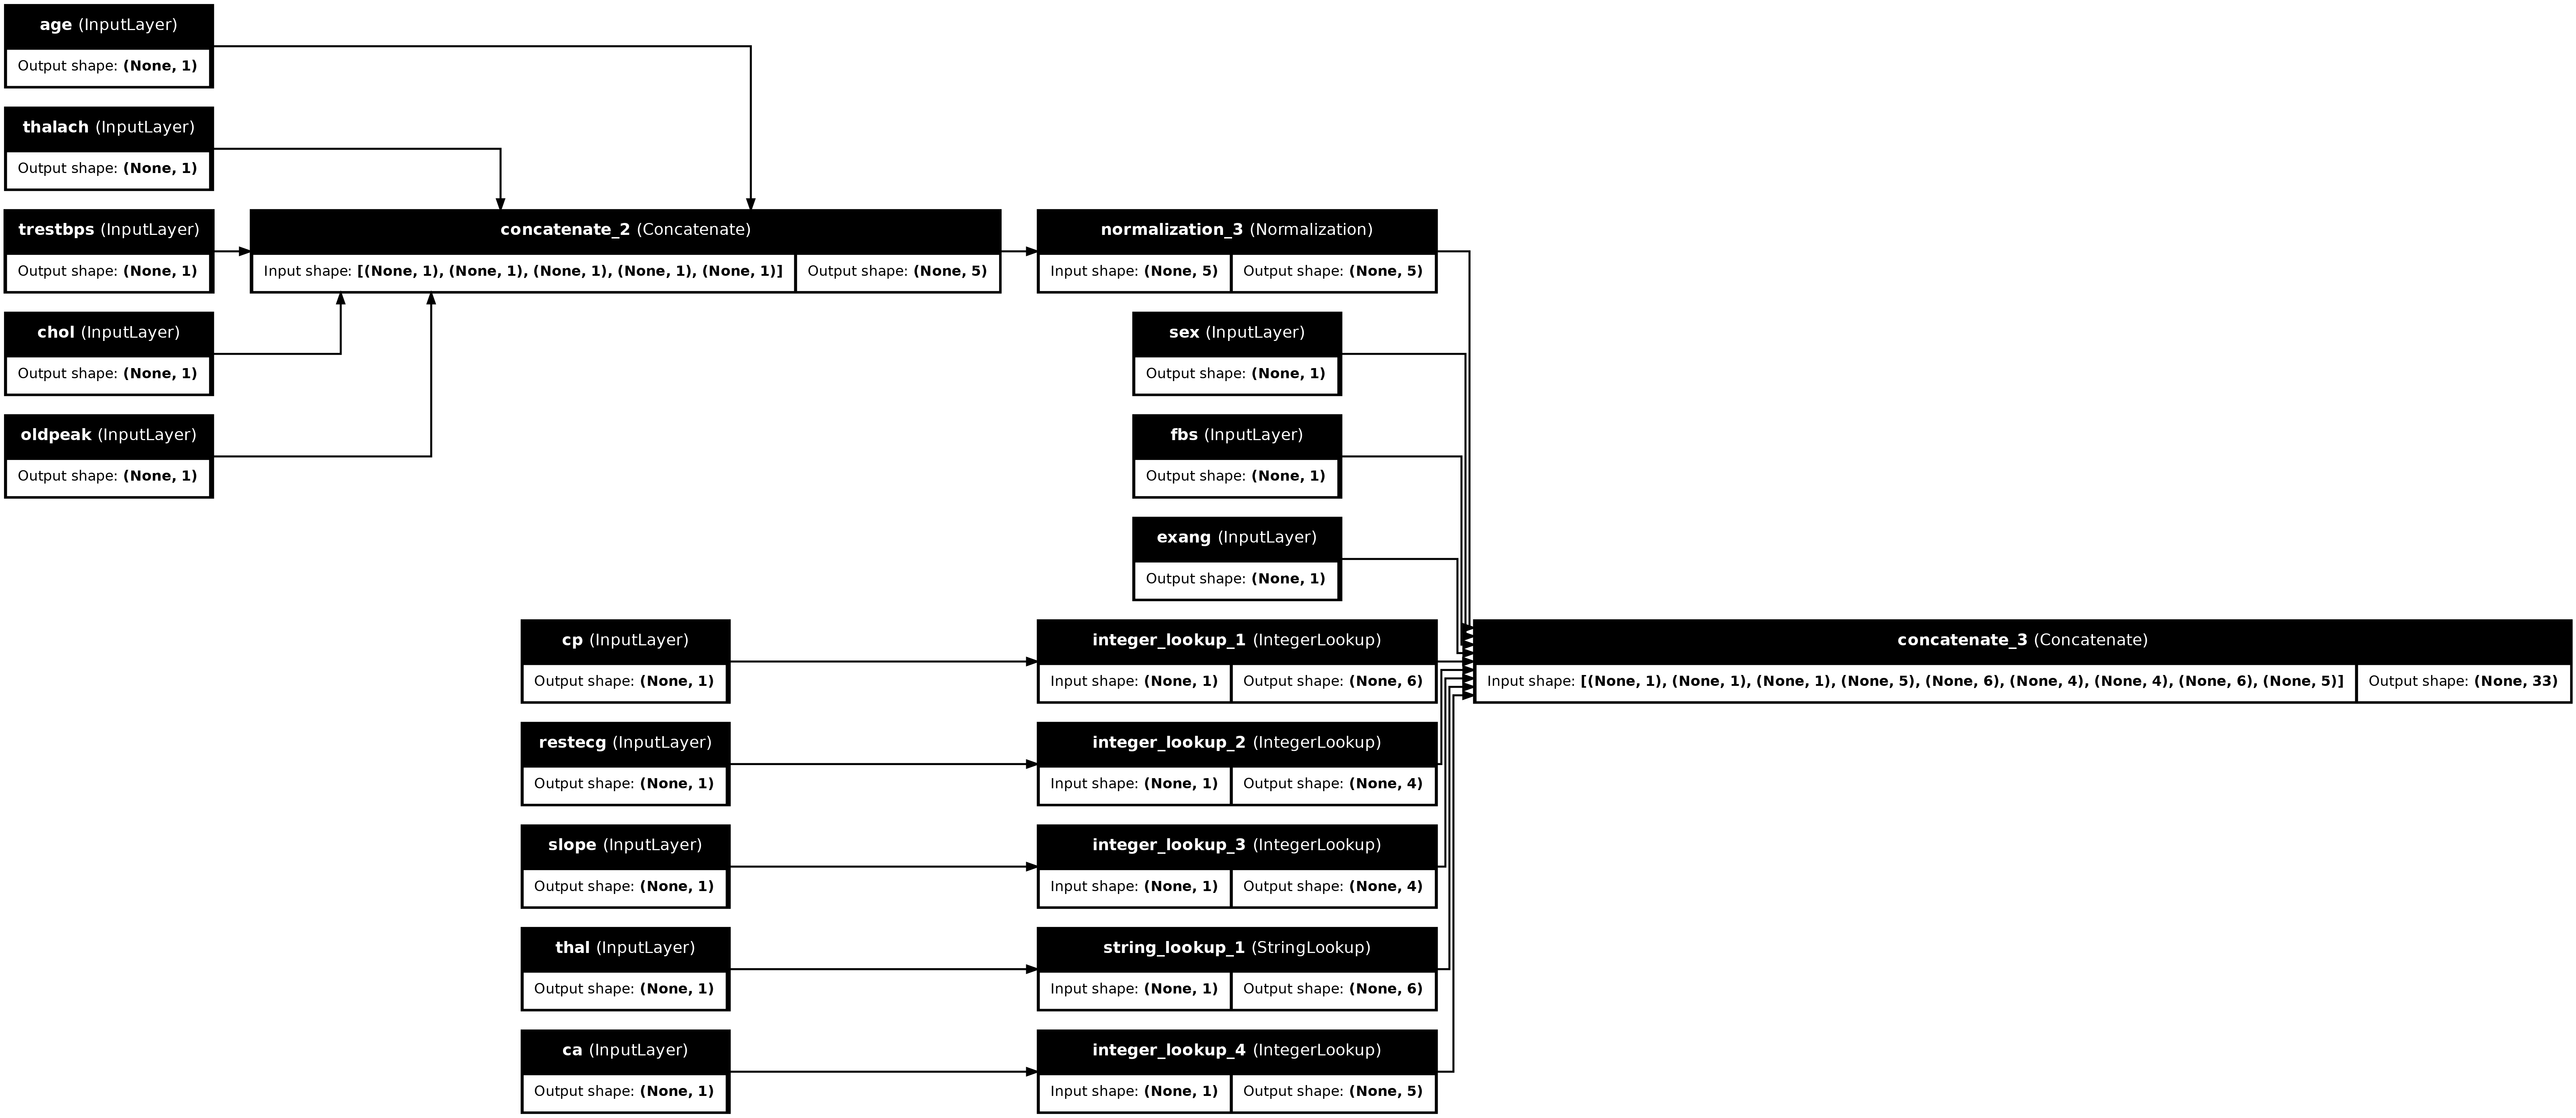

In [42]:
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True,  show_layer_names=True)

To test the preprocessor, use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" class="external">DataFrame.iloc</a> accessor to slice the first example from the DataFrame. Then convert it to a dictionary and pass the dictionary to the preprocessor. The result is a single vector containing the binary features, normalized numeric features and the one-hot categorical features, in that order:

In [43]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[  1.       ,   1.       ,   0.       ,   0.93384  ,  -1.8534899,
        123.75736  ,   3.6224306,  -7.3077087,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   1.       ,   0.       ,   0.       ,
          0.       ,   1.       ,   0.       ,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   1.       ,
          0.       ,   0.       ,   0.       ]], dtype=float32)>

### Create and train a model

Now build the main body of the model. Use the same configuration as in the previous example: A couple of `Dense` rectified-linear layers and a `Dense(1)` output layer for the classification.

In [44]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

Now put the two pieces together using the Keras functional API.

In [45]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=slope>,
 'ca': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>,
 'thal': <KerasTensor shape=(None, 1),

In [46]:
x = preprocessor(inputs)
x

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_29>

In [47]:
result = body(x)
result

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_34>

In [48]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

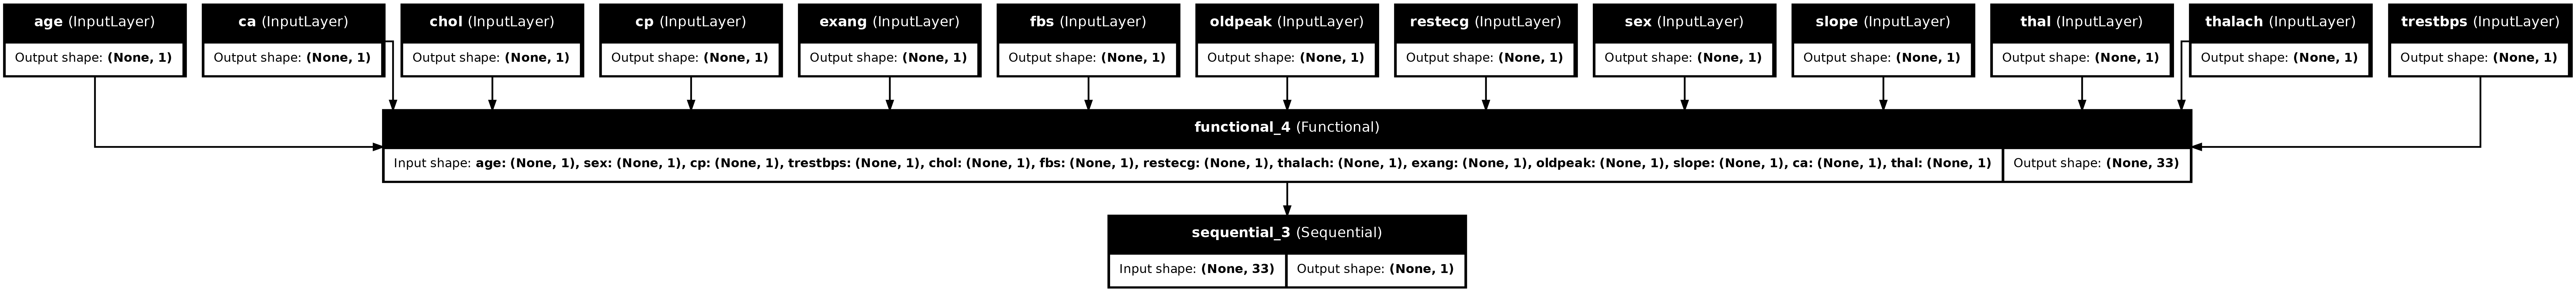

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True,  show_layer_names=True)

This model expects a dictionary of inputs. The simplest way to pass it the data is to convert the DataFrame to a dict and pass that dict as the `x` argument to `Model.fit`:

In [50]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 2:51 1s/step - accuracy: 0.0000e+00 - loss: 8.0170

 14/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1951 - loss: 6.1720     

 28/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2212 - loss: 5.3423

 42/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2353 - loss: 4.7022

 56/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2777 - loss: 4.1780

 70/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3178 - loss: 3.7772

 85/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3516 - loss: 3.4457

 99/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3766 - loss: 3.1996

113/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3973 - loss: 2.9970

127/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4147 - loss: 2.8270

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4317 - loss: 2.6806

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4448 - loss: 2.5713


Epoch 2/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 1.0000 - loss: 0.2956

 15/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6384 - loss: 0.6875 

 29/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6433 - loss: 0.6715

 43/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6386 - loss: 0.6643

 57/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6343 - loss: 0.6601

 72/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6394 - loss: 0.6524

 86/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6449 - loss: 0.6464

100/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6514 - loss: 0.6392

114/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6577 - loss: 0.6326

128/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6643 - loss: 0.6259

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6714 - loss: 0.6182

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6752 - loss: 0.6143


Epoch 3/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.5000 - loss: 0.7682

 15/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7189 - loss: 0.5942 

 30/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.5640

 44/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.5474

 58/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7618 - loss: 0.5378

 72/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7625 - loss: 0.5354

 87/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7603 - loss: 0.5361

101/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.5383

115/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7544 - loss: 0.5394

129/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7534 - loss: 0.5394

143/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7519 - loss: 0.5399

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7503 - loss: 0.5409


Epoch 4/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5000 - loss: 0.6701

 15/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5665 - loss: 0.6515 

 29/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6555 - loss: 0.5863

 43/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6893 - loss: 0.5647

 58/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7024 - loss: 0.5601

 72/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 0.5579

 87/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7095 - loss: 0.5577

102/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7090 - loss: 0.5585

117/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7100 - loss: 0.5576

131/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 0.5564

146/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 0.5549

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7133 - loss: 0.5542


Epoch 5/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.0000e+00 - loss: 1.2853

 15/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4885 - loss: 0.7261     

 29/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5393 - loss: 0.6678

 43/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5781 - loss: 0.6380

 57/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6059 - loss: 0.6160

 71/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6201 - loss: 0.6060

 85/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6313 - loss: 0.5986

 99/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6423 - loss: 0.5907

113/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6523 - loss: 0.5827

127/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6606 - loss: 0.5762

141/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6675 - loss: 0.5705

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6721 - loss: 0.5666


Using `tf.data` works as well:

In [51]:
ds = tf.data.Dataset.from_tensor_slices((
    dict(df),
    target
))

ds = ds.batch(BATCH_SIZE)

In [52]:
import pprint

for x, y in ds.take(1):
  pprint.pprint(x)
  print()
  print(y)

{'age': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([63, 67])>,
 'ca': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 3])>,
 'chol': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([233, 286])>,
 'cp': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 4])>,
 'exang': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>,
 'fbs': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>,
 'oldpeak': <tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.3, 1.5])>,
 'restecg': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2])>,
 'sex': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>,
 'slope': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 2])>,
 'thal': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'fixed', b'normal'], dtype=object)>,
 'thalach': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([150, 108])>,
 'trestbps': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([145, 160])>}

tf.Tensor([0 1], shape=(2,), dtype=int64)


In [53]:
history = model.fit(ds, epochs=5)

Epoch 1/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 1:50 730ms/step - accuracy: 0.5000 - loss: 0.6791

 14/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7493 - loss: 0.4957    

 27/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7513 - loss: 0.4805

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.4747

 53/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7558 - loss: 0.4703

 67/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.4672

 80/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7576 - loss: 0.4676

 93/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7569 - loss: 0.4681

106/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7559 - loss: 0.4693

120/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7546 - loss: 0.4711

134/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7529 - loss: 0.4728

148/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7518 - loss: 0.4742

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.4749


Epoch 2/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 0.6467

 14/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7493 - loss: 0.5192

 28/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7513 - loss: 0.4984

 41/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.4872

 55/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7560 - loss: 0.4781

 68/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7581 - loss: 0.4724

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7574 - loss: 0.4703

 95/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7568 - loss: 0.4687

108/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.4685

121/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7544 - loss: 0.4690

134/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7529 - loss: 0.4693

148/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7518 - loss: 0.4696

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.4700


Epoch 3/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 0.6170

 15/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7916 - loss: 0.4968

 29/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7839 - loss: 0.4763

 42/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7809 - loss: 0.4651

 55/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7788 - loss: 0.4567

 69/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7779 - loss: 0.4509

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.4490

 95/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7729 - loss: 0.4474

109/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7702 - loss: 0.4473

123/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7676 - loss: 0.4480

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7652 - loss: 0.4483

150/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7632 - loss: 0.4488

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7626 - loss: 0.4490


Epoch 4/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 0.5872

 14/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7159 - loss: 0.4824

 27/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7459 - loss: 0.4576

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7551 - loss: 0.4463

 53/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7593 - loss: 0.4372

 66/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7623 - loss: 0.4313

 79/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.4289

 93/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7619 - loss: 0.4271

107/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7604 - loss: 0.4268

121/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7585 - loss: 0.4275

134/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.4279

147/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7553 - loss: 0.4283

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7543 - loss: 0.4288


Epoch 5/5


  1/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 0.5580

 14/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7159 - loss: 0.4666

 27/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7459 - loss: 0.4391

 40/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7551 - loss: 0.4277

 54/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7595 - loss: 0.4177

 68/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.4116

 82/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7623 - loss: 0.4095

 96/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7617 - loss: 0.4075

109/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7597 - loss: 0.4078

123/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7573 - loss: 0.4087

137/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.4091

151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.4097

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7537 - loss: 0.4099
